# 在小型数据集上训练一个卷积神经网络
### Step 1：准备数据

In [3]:
import os
import shutil

# 原始数据集解压目录
original_dataset_dir = 'C:/Users/HP/Desktop/kaggle_original_data/train/'

# 保存较小数据集的目录
base_dir = 'D:/ML/cats_and_dogs_small'
os.mkdir(base_dir)

# 分别对应划分后的训练、验证和测试的目录
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 猫、狗的训练图像目录
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs') 
os.mkdir(train_dogs_dir)

# 猫、狗的验证图像目录
validation_cats_dir = os.path.join(validation_dir, 'cats') 
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs') 
os.mkdir(validation_dogs_dir)

# 猫、狗的测试图像目录
test_cats_dir = os.path.join(test_dir, 'cats') 
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs') 
os.mkdir(test_dogs_dir)

# 将前 1000 张猫的图像复制到 train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 将接下来 500 张猫的图像复制到 validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 将接下来的 500 张猫的图像复制到 test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# 将前 1000 张狗的图像复制到 train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 将接下来 500 张狗的图像复制到 validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 将接下来 500 张狗的图像复制到 test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

print('total training cat images:', len(os.listdir(train_cats_dir))) 
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir))) 
print('total validation dog images:', len(os.listdir(validation_dogs_dir))) 
print('total test cat images:', len(os.listdir(test_cats_dir))) 
print('total test dog images:', len(os.listdir(test_dogs_dir))) 

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


### Step 2：构建网络

In [1]:
from keras import layers 
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [6]:
from keras import optimizers

# 配置模型用于训练
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

### Step 3：数据预处理

In [4]:
from keras.preprocessing.image import ImageDataGenerator

# 将所有图像乘以 1/255 缩放
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


# 将所有图像的大小调整为 150×150
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150), 
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


In [10]:
# 利用批量生成器拟合模型
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

# 保存模型
model.save('cats_and_dogs_small_1.h5')

C:\Users\HP\AppData\Local\Temp\ipykernel_8852\1798899204.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 48s 483ms/step - loss: 0.0354 - acc: 0.9875 - val_loss: 1.1497 - val_acc: 0.7230
Epoch 2/30
100/100 [==============================] - 42s 420ms/step - loss: 0.0305 - acc: 0.9910 - val_loss: 1.1520 - val_acc: 0.7100
Epoch 3/30
100/100 [==============================] - 42s 416ms/step - loss: 0.0224 - acc: 0.9935 - val_loss: 1.3149 - val_acc: 0.7090
Epoch 4/30
100/100 [==============================] - 42s 416ms/step - loss: 0.0232 - acc: 0.9930 - val_loss: 1.2937 - val_acc: 0.7260
Epoch 5/30
100/100 [==============================] - 42s 415ms/step - loss: 0.0176 - acc: 0.9965 - val_loss: 1.3665 - val_acc: 0.7210
Epoch 6/30
100/100 [==============================] - 42s 421ms/step - loss: 0.0200 - acc: 0.9940 - val_loss: 1.3722 - val_acc: 0.7150
Epoch 7/30
100/100 [==============================] - 42s 418ms/step - loss: 0.0194 - acc: 0.9940 - val_loss: 1.4512 - val_acc: 0.7150
Epoch 8/30
100/100 [==============================] - 4

### Step 4：绘制图像
**绘制训练过程中的损失曲线和精度曲线**

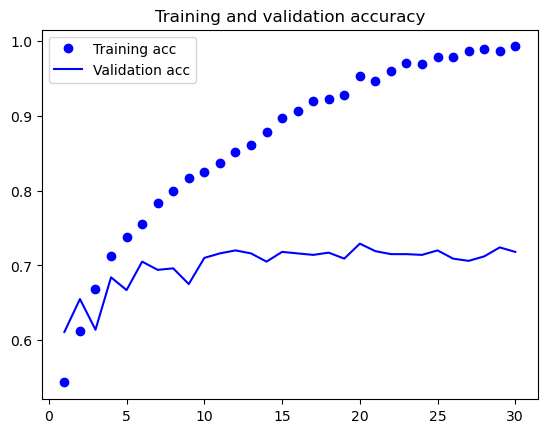

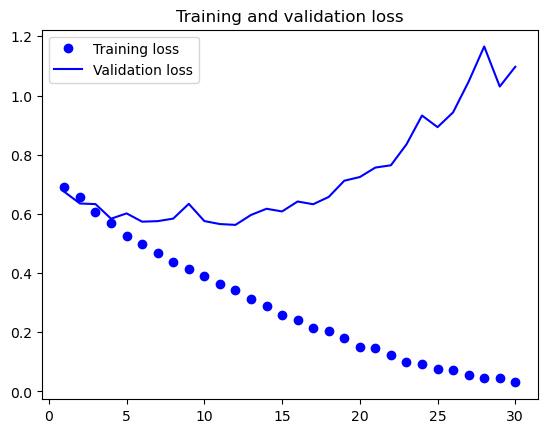

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Step 5：数据增强

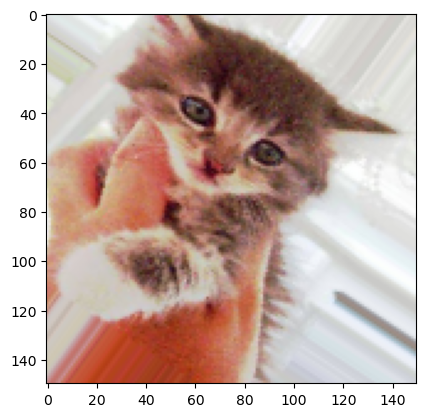

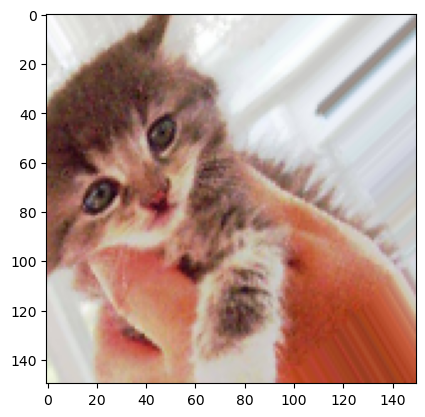

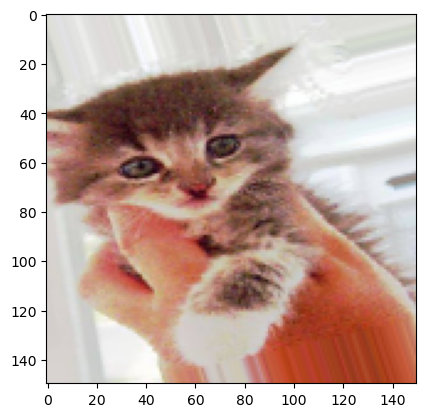

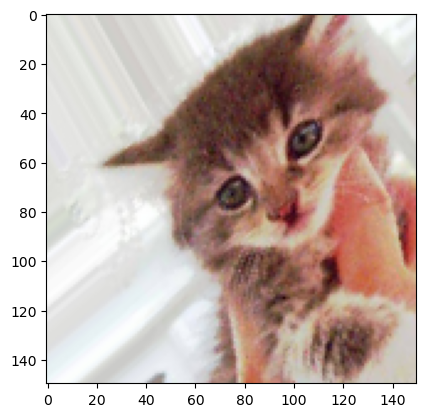

In [16]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

from keras.preprocessing import image
from keras.utils import image_utils 

fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image_utils.load_img(img_path, target_size=(150, 150))

x = image_utils.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image_utils.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

### Step 6：定义一个包含dropout的新卷积神经网络

In [18]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150), 
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
        train_generator,
        steps_per_epoch=63,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=32)
model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


C:\Users\HP\AppData\Local\Temp\ipykernel_8852\1623144994.py:44: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
63/63 [==============================] - 51s 794ms/step - loss: 0.6945 - acc: 0.5115 - val_loss: 0.6883 - val_acc: 0.5700
Epoch 2/100
63/63 [==============================] - 43s 686ms/step - loss: 0.6877 - acc: 0.5440 - val_loss: 0.6788 - val_acc: 0.5270
Epoch 3/100
63/63 [==============================] - 43s 684ms/step - loss: 0.6795 - acc: 0.5845 - val_loss: 0.6575 - val_acc: 0.6100
Epoch 4/100
63/63 [==============================] - 43s 673ms/step - loss: 0.6724 - acc: 0.5845 - val_loss: 0.6545 - val_acc: 0.6270
Epoch 5/100
63/63 [==============================] - 43s 680ms/step - loss: 0.6624 - acc: 0.5945 - val_loss: 0.6738 - val_acc: 0.5910
Epoch 6/100
63/63 [==============================] - 44s 698ms/step - loss: 0.6546 - acc: 0.6235 - val_loss: 0.6934 - val_acc: 0.5780
Epoch 7/100
63/63 [==============================] - 42s 668ms/step - loss: 0.6386 - acc: 0.6305 - val_loss: 0.6086 - val_acc: 0.6500
Epoch 8/100
63/63 [==============================] - 42s 665ms

Epoch 62/100
63/63 [==============================] - 42s 665ms/step - loss: 0.4709 - acc: 0.7665 - val_loss: 0.4612 - val_acc: 0.7810
Epoch 63/100
63/63 [==============================] - 42s 667ms/step - loss: 0.4795 - acc: 0.7705 - val_loss: 0.4599 - val_acc: 0.7780
Epoch 64/100
63/63 [==============================] - 46s 725ms/step - loss: 0.4541 - acc: 0.7850 - val_loss: 0.4941 - val_acc: 0.7650
Epoch 65/100
63/63 [==============================] - 53s 837ms/step - loss: 0.4487 - acc: 0.7835 - val_loss: 0.4480 - val_acc: 0.7850
Epoch 66/100
63/63 [==============================] - 50s 796ms/step - loss: 0.4497 - acc: 0.7845 - val_loss: 0.4462 - val_acc: 0.7890
Epoch 67/100
63/63 [==============================] - 51s 808ms/step - loss: 0.4443 - acc: 0.7880 - val_loss: 0.4473 - val_acc: 0.7880
Epoch 68/100
63/63 [==============================] - 50s 797ms/step - loss: 0.4534 - acc: 0.7875 - val_loss: 0.4426 - val_acc: 0.7960
Epoch 69/100
63/63 [==============================] - 5

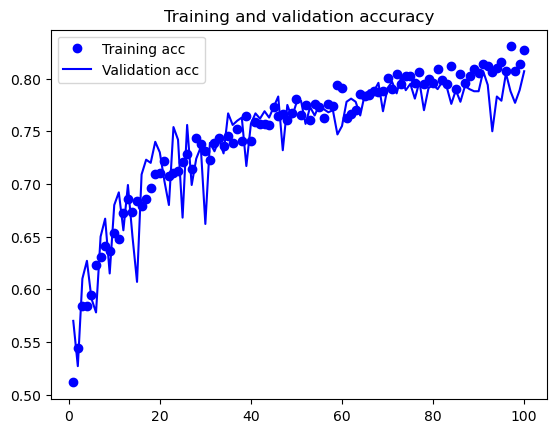

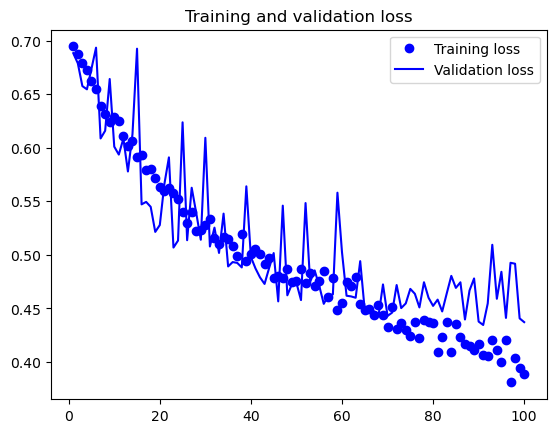

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

results = model.evaluate(test_generator)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 9s 172ms/step - loss: 0.4387 - acc: 0.8010


In [21]:
results

[0.4387029707431793, 0.8009999990463257]